<a target="_blank" href="https://colab.research.google.com/github/pds2425/course/blob/main/notebooks/04_Feature_Engineering_solutions.ipynb
">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<div class='bar_title'></div>

*Practical Data Science*

# Feature Engineering

Gunther Gust & Viet Nguyen<br>
Chair for Enterprise AI 

<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Data</a></span></li><li><span><a href="#Select-Variables-and-Split-Dataset" data-toc-modified-id="Select-Variables-and-Split-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Select Variables and Split Dataset</a></span></li><li><span><a href="#Feature-Engineering-on-Numeric-Data" data-toc-modified-id="Feature-Engineering-on-Numeric-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering on Numeric Data</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Standardization</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Binarization" data-toc-modified-id="Binarization-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Binarization</a></span></li><li><span><a href="#Binning" data-toc-modified-id="Binning-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Binning</a></span><ul class="toc-item"><li><span><a href="#Fixed-Width-Binning" data-toc-modified-id="Fixed-Width-Binning-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Fixed-Width Binning</a></span></li><li><span><a href="#Adaptive-Binning" data-toc-modified-id="Adaptive-Binning-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Adaptive Binning</a></span></li></ul></li><li><span><a href="#Statistical-Transformations" data-toc-modified-id="Statistical-Transformations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Statistical Transformations</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Feature-Engineering-on-Categorical-Data" data-toc-modified-id="Feature-Engineering-on-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering on Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Label-and-One-Hot-Encoding" data-toc-modified-id="Label-and-One-Hot-Encoding-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Label and One-Hot-Encoding</a></span></li><li><span><a href="#Count-Encodings" data-toc-modified-id="Count-Encodings-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Count Encodings</a></span></li><li><span><a href="#Target-Encodings" data-toc-modified-id="Target-Encodings-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Target Encodings</a></span></li><li><span><a href="#CatBoost-Encoding" data-toc-modified-id="CatBoost-Encoding-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>CatBoost Encoding</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Warning</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

__Credits__

Parts of the material of this lecture are adopted from www.kaggle.com

## Introduction

**This lecture provides an overview on different feature engineering techniques.**

Starting with a baseline dataset, we will

- modify existing variables 
- add additional features to  our dataset 
- train a predictive model 

**Feature engineering** is an essential part of building a powerful predictive model. 

Each problem is domain specific and better features (suited to the problem) are often the deciding factor of the performance of your system. 

Feature Engineering requires experience as well as creativity and this is the reason **Data Scientists often spend the majority of their time** in the data preparation phase before modeling.

_"Coming up with features is difficult, time-consuming, requires expert knowledge. Applied machine learning is basically feature engineering."_

Prof. Andrew Ng.

_"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data."_

Dr. Jason Brownlee

_"At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used."_

Prof. Pedro Domingos

## Loading the Data
This week, we will work with a sample of the [adult dataset](https://archive.ics.uci.edu/ml/datasets/adult) which has some __census information on individuals__. We'll use it to train a model to predict whether __salary is greater than 50k USD or not.__ Again, our first step is to load and familiarize ourself with the data:

In [1]:
import pandas as pd

In [2]:
file_path = 'https://raw.githubusercontent.com/GuntherGust/tds2_data/main/data/adult.csv'
adult_data = pd.read_csv(file_path)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


## Select Variables and Split Dataset

Before we start to engineer new features, we select the feature and target variables. 

The (binary) variable ``salary`` describes if a person earns more or less that \\$50k. We replace the labels with numeric values (0: Salary < \\$50k, 1: Salary > \\$50k) and subsequently select it as our target variable y.

In [3]:
adult_data = adult_data.assign(salary=(adult_data['salary']=='>=50k').astype(int))
print(adult_data.head())

y = adult_data['salary']


   age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country  salary  
0   Female             0          1

The remaining columns serve as our features X.

In [4]:
X = adult_data.drop('salary', axis=1)

Next, we perform a train-test split to train and evaluate our machine learning models for the model validation.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Now we are ready to start preparing and enhancing our numerical and categorical features!

## Feature Engineering on Numeric Data

By Numeric data we mean continuous data and not discrete data which is typically represented as categorical data. Integers and floats are the most common and widely used numeric data types for continuous numeric data. Even though numeric data can be directly fed into machine learning models, we still have to engineer and preprocess features which are relevant to the scenario, problem, domain and machine learning model.

To this end, we can distinguish between preprocessing and feature generation.

To work on our numeric features, we have to identify all numeric columns in our dataset:

In [7]:
numCols = [cname for cname in train_X.columns if train_X[cname].dtype != "object"]
numCols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

To avoid problems with missing values we use a ``SimpleImputer`` for the numeric columns before we continue:

In [8]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer()

train_X_num = pd.DataFrame(simple_imputer.fit_transform(train_X[numCols]), columns=numCols, index=train_X.index)
val_X_num = pd.DataFrame(simple_imputer.transform(val_X[numCols]), columns=numCols, index=val_X.index)

### Preprocessing

Our dataset may contain attributes with a mixture of scales for various quantities. However, many machine learning methods require or at least are more effective if the data attributes have the same scale. 

For example, ``capital gain`` and ``capital loss`` is measured in USD while age is measured in years in our dataset at hand.

To avoid having numeric values from different scales we can use two popular data scaling methods: normalization and standardization.

#### Normalization

Normalization refers to rescaling numeric attributes into the __range between 0 and 1.__ It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

Using Scikit-learn's ``MinMaxScaler`` we can rescale an attribute according to the following formula:


\begin{equation}
    X = \frac{(X - min(X))}{(max(X) - min(X))}
\end{equation}

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_X_num_normalized = pd.DataFrame(scaler.fit_transform(train_X_num), 
                                      columns=train_X_num.columns, index=train_X_num.index)
val_X_num_normalized = pd.DataFrame(scaler.transform(val_X_num), 
                                    columns=train_X_num.columns, index=val_X_num.index)

train_X_num_normalized

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
26464,0.136986,0.215102,0.533333,0.00000,0.0,0.397959
16134,0.054795,0.118419,0.600000,0.00000,0.0,0.193878
4747,0.465753,0.038438,0.066667,0.00000,0.0,0.346939
8369,0.095890,0.128628,0.533333,0.00000,0.0,0.602041
5741,0.205479,0.064474,0.800000,0.00000,0.0,0.397959
...,...,...,...,...,...,...
13123,0.041096,0.093175,0.600000,0.00000,0.0,0.244898
19648,0.205479,0.176642,0.733333,0.00000,0.0,0.397959
9845,0.315068,0.039635,0.000000,0.00000,0.0,0.193878
10799,0.150685,0.011654,0.533333,0.00000,0.0,0.397959


#### Standardization

In contrast to normalization, we could also use standardization for our numerical variables. In this context, standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one. It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

Using Scikit-learn's ```StandardScaler``` we can rescale an attribute according to the following formula:


\begin{equation}
    X = \frac{(X - mean(X))}{\sqrt{var(X)}}
\end{equation}

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X_num_standardized = pd.DataFrame(scaler.fit_transform(train_X_num), 
                                        columns=train_X_num.columns, index=train_X_num.index)
val_X_num_standardized = pd.DataFrame(scaler.transform(val_X_num), 
                                      columns=train_X_num.columns, index=val_X_num.index)

train_X_num_standardized.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
26464,-0.853017,1.316410,-0.420746,-0.146391,-0.217388,-0.036400
16134,-1.292554,-0.027373,-0.029346,-0.146391,-0.217388,-1.652429
4747,0.905131,-1.139029,-3.160546,-0.146391,-0.217388,-0.440408
8369,-1.072786,0.114522,-0.420746,-0.146391,-0.217388,1.579628
5741,-0.486737,-0.777155,1.144853,-0.146391,-0.217388,-0.036400


#### Summary

Data rescaling is an important part of data preparation before applying machine learning algorithms. However, it is hard to know whether normalization or standardization of the data will improve the performance of a predictive model in advance. 

A good tip for a practical application is to create rescaled copies of your dataset and evaluate them against each other. This process can quickly show which rescaling method will improve your selected models in the problem at hand.

### Binarization

For some problems raw frequencies or counts may not be relevant for building a model. In these cases it is only relevant if a numeric value exceeds a specific threshold (e.g. a person is at least 40 years old). Hence we do not require the number of times the action was performed but only a binary feature.

We can binarize a feature using Scikit-learn's ``Binarizer`` function (Note that we use the raw dataset for this example - clearly we could normalize or standardize the dataframe afterwards):

In [11]:
from sklearn.preprocessing import Binarizer

train_X_binary_age = train_X_num.copy()
val_X_binary_age = val_X_num.copy()

binarizer = Binarizer(threshold=40)

train_X_binary_age['40Plus'] = binarizer.transform([train_X_binary_age['age']])[0]
val_X_binary_age['40Plus'] = binarizer.transform([val_X_binary_age['age']])[0]

train_X_binary_age.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,40Plus
26464,27.0,329005.0,9.0,0.0,0.0,40.0,0.0
16134,21.0,186648.0,10.0,0.0,0.0,20.0,0.0
4747,51.0,68882.0,2.0,0.0,0.0,35.0,1.0
8369,24.0,201680.0,9.0,0.0,0.0,60.0,0.0
5741,32.0,107218.0,13.0,0.0,0.0,40.0,0.0


### Binning

The problem of working with raw, numeric features is that often the distribution of values in these features will be skewed. This signifies that some values will occur quite frequently while some will be quite rare. Hence there are strategies to deal with this, which include binning. 

Binning is used for transforming continuous numeric features into discrete ones. These discrete values can be interpreted as categories or bins into which the raw values are grouped into. Each group represents a specific degree of intensity and hence a specific range of continuous numeric values fall into it.

Let's again use the age variable to perform two different types of binning.

#### Fixed-Width Binning

In fixed-width binning, specific fixed widths for each bin are defined by the user. Each bin has a fixed range of values which should be assigned to that bin on the basis of some domain knowledge.

We can use Pandas ```cut``` function to bin the age into predefined groups and assign labels:

In [12]:
train_X_bin_age = train_X_num.copy()
val_X_bin_age = val_X_num.copy()

bin_ranges = [0, 25, 60, 999]
bin_labels = [0, 1, 2]

train_X_bin_age['AgeBinned'] = pd.cut(train_X_bin_age['age'], 
                                      bins=bin_ranges, labels=bin_labels)
val_X_bin_age['AgeBinned'] = pd.cut(val_X_bin_age['age'], 
                                    bins=bin_ranges, labels=bin_labels)

train_X_bin_age.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,AgeBinned
26464,27.0,329005.0,9.0,0.0,0.0,40.0,1
16134,21.0,186648.0,10.0,0.0,0.0,20.0,0
4747,51.0,68882.0,2.0,0.0,0.0,35.0,1
8369,24.0,201680.0,9.0,0.0,0.0,60.0,0
5741,32.0,107218.0,13.0,0.0,0.0,40.0,1


#### Adaptive Binning

The major drawback in using fixed-width binning is __unbalanced bin sizes.__ As we manually decide the bin ranges, we can end up with irregular bins which are not uniform based on the number of data points. Some bins (such as "young (0)" and "old (2)") might be sparsely populated while some (such as "medium (1)") are densely populated.

To overcome this issues we can use adaptive binning based on the distribution of the data.

To cut the space into equal partitions we can use the quantiles as cut-points:

In [13]:
quantile_list = [0, 0.33, 0.66, 1]
quantile_labels = [0, 1, 2]

train_X_bin_age['AgeBinnedAdaptive'] = pd.qcut(train_X_bin_age['age'], 
                                               q=quantile_list, labels=quantile_labels)
val_X_bin_age['AgeBinnedAdaptive'] = pd.qcut(val_X_bin_age['age'],   
                                             q=quantile_list, labels=quantile_labels)

train_X_bin_age.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,AgeBinned,AgeBinnedAdaptive
26464,27.0,329005.0,9.0,0.0,0.0,40.0,1,0
16134,21.0,186648.0,10.0,0.0,0.0,20.0,0,0
4747,51.0,68882.0,2.0,0.0,0.0,35.0,1,2
8369,24.0,201680.0,9.0,0.0,0.0,60.0,0,0
5741,32.0,107218.0,13.0,0.0,0.0,40.0,1,1


### Statistical Transformations

Many variables, such as ``capital-gain`` or ``fnlwgt`` (sampling weight) span several orders of magnitude. While the vast majority of persons has very small capital-gains, a few people have very high gains. To work with such skewed variables we can use the log transformation. 

__Log transforms__ are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible.

In [14]:
import numpy as np

train_X_logGains = train_X_num.copy()
val_X_logGains = val_X_num.copy()

train_X_logGains['logfnlwgt'] = np.log1p(train_X_logGains['fnlwgt'])
val_X_logGains['logfnlwgt'] = np.log1p(val_X_logGains['fnlwgt'])

We can see this effect plotting both histograms:

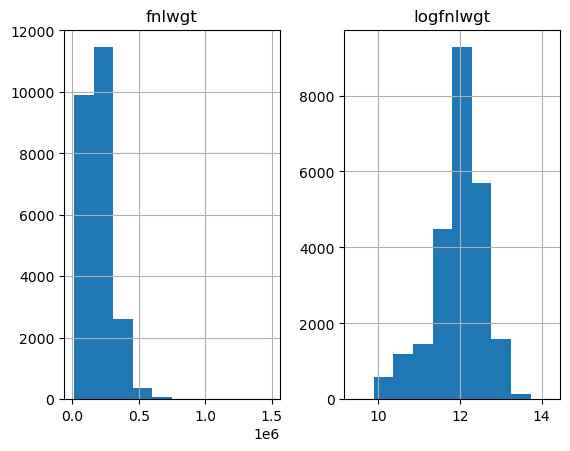

In [15]:
%matplotlib inline
train_X_logGains[['fnlwgt', 'logfnlwgt']].hist();

### Evaluation

We can train support vector machines (support vector classifiers, ``SVC``) using the different datasets and feature engineering techniques to evaluate their impact on the model performance. Note that we could (and should) combine these techniques to train powerful models and apply them in real-world problems.

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = SVC(gamma='auto', random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

In [17]:
print("Raw Features: {}".
      format(score_dataset(train_X_num, val_X_num, train_y, val_y)))
print("Normalized Features: {}".
      format(score_dataset(train_X_num_normalized, val_X_num_normalized, train_y, val_y)))
print("Standardized Features: {}".
      format(score_dataset(train_X_num_standardized, val_X_num_standardized, train_y, val_y)))
print("Binary Age: {}".format(score_dataset(train_X_binary_age, val_X_binary_age, train_y, val_y)))
print("Binned Age: {}".format(score_dataset(train_X_bin_age, val_X_bin_age, train_y, val_y)))
print("Log FNLWGT: {}".format(score_dataset(train_X_logGains, val_X_logGains, train_y, val_y)))

Raw Features: 0.7558039552880481
Normalized Features: 0.800761577201818
Standardized Features: 0.8204151824100233
Binary Age: 0.7560496253531507
Binned Age: 0.7560496253531507
Log FNLWGT: 0.7560496253531507


# Exercises
1. Replace `SVC` model with the `RandomForestClassifier` model and retrain the model with: Raw Features, Normalized Features and Standardized Features. Hint: import the model in this [scikit-learn documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html). You only need to set `n_estimators=100` and `random_state=1`.

2. Can you explain why the results are relatively the same?

# Solutions

In [18]:
from sklearn.ensemble import RandomForestClassifier

def score_dataset_rf(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

print("Raw Features: {}".
      format(score_dataset_rf(train_X_num, val_X_num, train_y, val_y)))
print("Normalized Features: {}".
      format(score_dataset_rf(train_X_num_normalized, val_X_num_normalized, train_y, val_y)))
print("Standardized Features: {}".
      format(score_dataset_rf(train_X_num_standardized, val_X_num_standardized, train_y, val_y)))

Raw Features: 0.806411988699177
Normalized Features: 0.8061663186340744
Standardized Features: 0.8056749785038693


Scaling techniques aim to put all features into the same scale, preventing any single feature from dominating others in priority. These techniques are crucial for distance-based algorithms that rely on distance measures for their calculations such as K-Nearest-Neighbors or Support Vector Machines. On the other hand, Random Forest is a tree-based modelm not a distance-based one. The algorithm partitions data to make predictions, and each partition (or split) of a decision tree is soly based on one feature, which is independent of other features. Therefore, scaling is unncessary for tree-based algorithms. For more in-depth explanation, check the [resource here](https://www.kdnuggets.com/2022/07/random-forest-algorithm-need-normalization.html).

## Feature Engineering on Categorical Data

In contrast to continuous numeric data we mean discrete values which belong to a specific finite set of categories or classes when we talk about categorical data. These discrete values can be text or numeric in nature and there are two major classes of categorical data, nominal and ordinal.

While a lot of advancements have been made in state of the art machine learning frameworks to accept categorical data types like text labels. Typically any standard workflow in feature engineering involves some form of transformation of these categorical values into numeric labels and then applying some encoding scheme on these values.

### One-Hot-Encoding

Last week, we already talked about label and one-hot-encoding to prepare our categorical features for machine learning models. To get started, we will impute missing values and encode all categorical features using the ``OneHotEncoder``:

In [19]:
from sklearn.preprocessing import OneHotEncoder

Again, we will use a helper function to evaluate the performance of our models. This time, we will rely on a random forest model.

In [20]:
catCols = [cname for cname in train_X.columns if train_X[cname].dtype == "object"]

train_X_cat = train_X[catCols].copy()
val_X_cat = val_X[catCols].copy()


In [21]:
simple_imputer = SimpleImputer(strategy='most_frequent')

train_X_imputed = pd.DataFrame(simple_imputer.fit_transform(train_X_cat), columns=train_X_cat.columns, index=train_X_cat.index)
val_X_imputed  = pd.DataFrame(simple_imputer.transform(val_X_cat), columns=val_X_cat.columns, index=val_X_cat.index)

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_X_OHenc = pd.DataFrame(oh_encoder.fit_transform(train_X_imputed), index=train_X_imputed.index)
val_X_OHenc = pd.DataFrame(oh_encoder.transform(val_X_imputed), index=val_X_imputed.index)



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

To evaluate the model we combine the raw numerical data and the encoded categorical variables.

In [23]:
train_X_OH_num = train_X_num.join(train_X_OHenc.add_suffix("_OHenc"))
val_X_OH_num = val_X_num.join(val_X_OHenc.add_suffix("_OHenc"))


print("One-Hot encoded categorical + raw numeric: {}".
      format(score_dataset(train_X_OH_num, val_X_OH_num, train_y, val_y)))

One-Hot encoded categorical + raw numeric: 0.8523522908733571


### Count Encodings

While label and one-hot encoding often yield good results, there are also a lot of other (more complex) techniques to encode categorical variables. The package [categorical-encoding](https://github.com/scikit-learn-contrib/categorical-encoding) offers implementations of many different techniques.

One prominent variant is called count encoding. Count encoding replaces each categorical value with the number of times it appears in the dataset. For example, if the value "USA" occures 50 times in the country feature, then each "USA" would be replaced with the number 50.

In [24]:
from category_encoders import CountEncoder

count_encoder = CountEncoder(handle_unknown=0, handle_missing='value')

train_X_countenc = count_encoder.fit_transform(train_X_cat)
val_X_countenc = count_encoder.transform(val_X_cat)

train_X_count_num = train_X_num.join(train_X_countenc.add_suffix("_countenc"))
val_X_count_num = val_X_num.join(val_X_countenc.add_suffix("_countenc"))

print("Count encoded categorical + raw numeric: {}".
      format(score_dataset(train_X_count_num, val_X_count_num, train_y, val_y)))

Count encoded categorical + raw numeric: 0.8500184252548827


### Target Encodings

Target encoding is another advanced (but sometimes dangerous) approach to encode categorical features. It replaces a categorical value with the average value of the target for that value of the feature. 


For example, given the country value "GER", you'd calculate the average outcome for all the rows with country == 'GER'. This value is often blended with the target probability over the entire dataset to reduce the variance of values with few occurences and to avoid overfitting. See [here](https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69) for a more detailed explanation.


__Attention:__ This technique uses the targets to create new features. So including the validation or test data in the target encodings would be a form of target leakage. Instead, you should learn the target encodings from the __training dataset only__ and apply it to the other datasets (as we did with all other encoding methods).

See also [here](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64) for another illustrative example. 

In [25]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()

train_X_targetenc = target_encoder.fit_transform(train_X_cat, train_y)
val_X_targetenc = target_encoder.transform(val_X_cat)

train_X_target_num = train_X_num.join(train_X_targetenc.add_suffix("_targetenc"))
val_X_target_num = val_X_num.join(val_X_targetenc.add_suffix("_targetenc"))

print("Target encoded categorical + raw numeric: {}".
      format(score_dataset(train_X_target_num, val_X_target_num, train_y, val_y)))

Target encoded categorical + raw numeric: 0.8524751259059083


### CatBoost Encoding

Finally, we'll look at CatBoost encoding. CatBoost extends the target encoding approach. It reduces problems of target encoding regarding target leakage and overfitting.

Roughtly, Catboost encoding is similar to target encoding in that it's based on the target probablity for a given value. However with CatBoost, for each row, the __target probability__ is calculated only from __the rows before it__. Interested readers may find more details [here](https://towardsdatascience.com/how-catboost-encodes-categorical-variables-3866fb2ae640). 

In [26]:
from category_encoders import CatBoostEncoder

catboost_encoder = CatBoostEncoder()

train_X_catboostenc = catboost_encoder.fit_transform(train_X_cat, train_y)
val_X_catboostenc = catboost_encoder.transform(val_X_cat)

train_X_catboost_num = train_X_num.join(train_X_catboostenc.add_suffix("_targetenc"))
val_X_catboost_num = val_X_num.join(val_X_catboostenc.add_suffix("_targetenc"))

print("CatBoost encoded categorical + raw numeric: {}".
      format(score_dataset(train_X_catboost_num, val_X_catboost_num, train_y, val_y)))

CatBoost encoded categorical + raw numeric: 0.860090897924088


### Warning

Target encoding is a powerful but dangerous way to improve on your machine learning methods. 

Advantages: 
* Compact transformation of categorical variables
* Powerful basis for feature engineering

Disadvantages:
* Careful validation is required to avoid overfitting
* Significant performance improvements only on some datasets

# Exercises

1. Rewrite the score_dataset to use Support Vector Classifier `SVC` and train the case of CatBoost Encoding again with `SVC`. Hint: you can use the provided `score_dataset_svc` below, which is copied from the section "Feature Engineering on Numeric Data" above.

2. Use standardized numeric features, i.e. `train_X_num_standardized` and `val_X_num_standardized` from previous section and combine it with CatBoost Encoding for training the `SVC` model.

The final results should have two cases: 

- One-hot encoded categorical + standardized numeric
- CatBoost encoded categorical + standardized numeric


# Solutions

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use this for the exercises
def score_dataset_svc(X_train, X_valid, y_train, y_valid):
    model = SVC(gamma='auto', random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

In [28]:
# Join the standardized features of train & validation sets with the one-hot encoded categorical features 
train_X_onehot_num_std = train_X_num_standardized.join(train_X_OHenc.add_suffix("_targetenc"))
val_X_onehot_num_std = val_X_num_standardized.join(val_X_OHenc.add_suffix("_targetenc"))

# Train CatBoost encoded categorical + standardized numeric
print("Target encoded categorical + standardized numeric: {}".
      format(score_dataset_svc(train_X_onehot_num_std, val_X_onehot_num_std, train_y, val_y)))

Target encoded categorical + standardized numeric: 0.8506326004176391


In [29]:
# Join the standardized features of train & validation sets with the CatBoost encoded categorical features 
train_X_catboost_num_std = train_X_num_standardized.join(train_X_catboostenc.add_suffix("_targetenc"))
val_X_catboost_num_std = val_X_num_standardized.join(val_X_catboostenc.add_suffix("_targetenc"))

# Train CatBoost encoded categorical + standardized numeric
print("CatBoost encoded categorical + standardized numeric: {}".
      format(score_dataset_svc(train_X_catboost_num_std, val_X_catboost_num_std, train_y, val_y)))

CatBoost encoded categorical + standardized numeric: 0.8487900749293699


## Mentimeters

## Conclusion

Today, we have seen a variety of ways to encode numerical and categorical features to improve the performance of our machine learning models. To try even more encoding methods you can try the implementations in the categorical-encoding package on [github](https://github.com/scikit-learn-contrib/categorical-encoding).

While the approaches we have talked about today have the potential to create powerful models, they require a lot of manual tuning and testing. 